In [ ]:
# Importing numpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Import Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Read the given CSV file, and view some sample records
stroke_data = pd.read_csv("stroke_health.csv")
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
bmi_outliers = stroke_data[stroke_data['bmi'] > 50]
bmi_outliers['bmi'].shape

(79,)

In [ ]:
print(bmi_outliers['stroke'].value_counts())

0    78
1     1
Name: stroke, dtype: int64


In [ ]:
#Mean - missed value
stroke_data["bmi"] = stroke_data["bmi"].replace(np.NaN, stroke_data["bmi"].mean())
print(stroke_data["bmi"][:10])

0    36.600000
1    28.893237
2    32.500000
3    34.400000
4    24.000000
5    29.000000
6    27.400000
7    22.800000
8    28.893237
9    24.200000
Name: bmi, dtype: float64


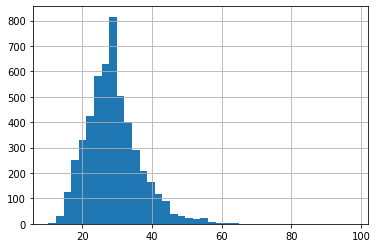

In [ ]:
stroke_data['bmi'].hist(bins=40)

### EDA

In [ ]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


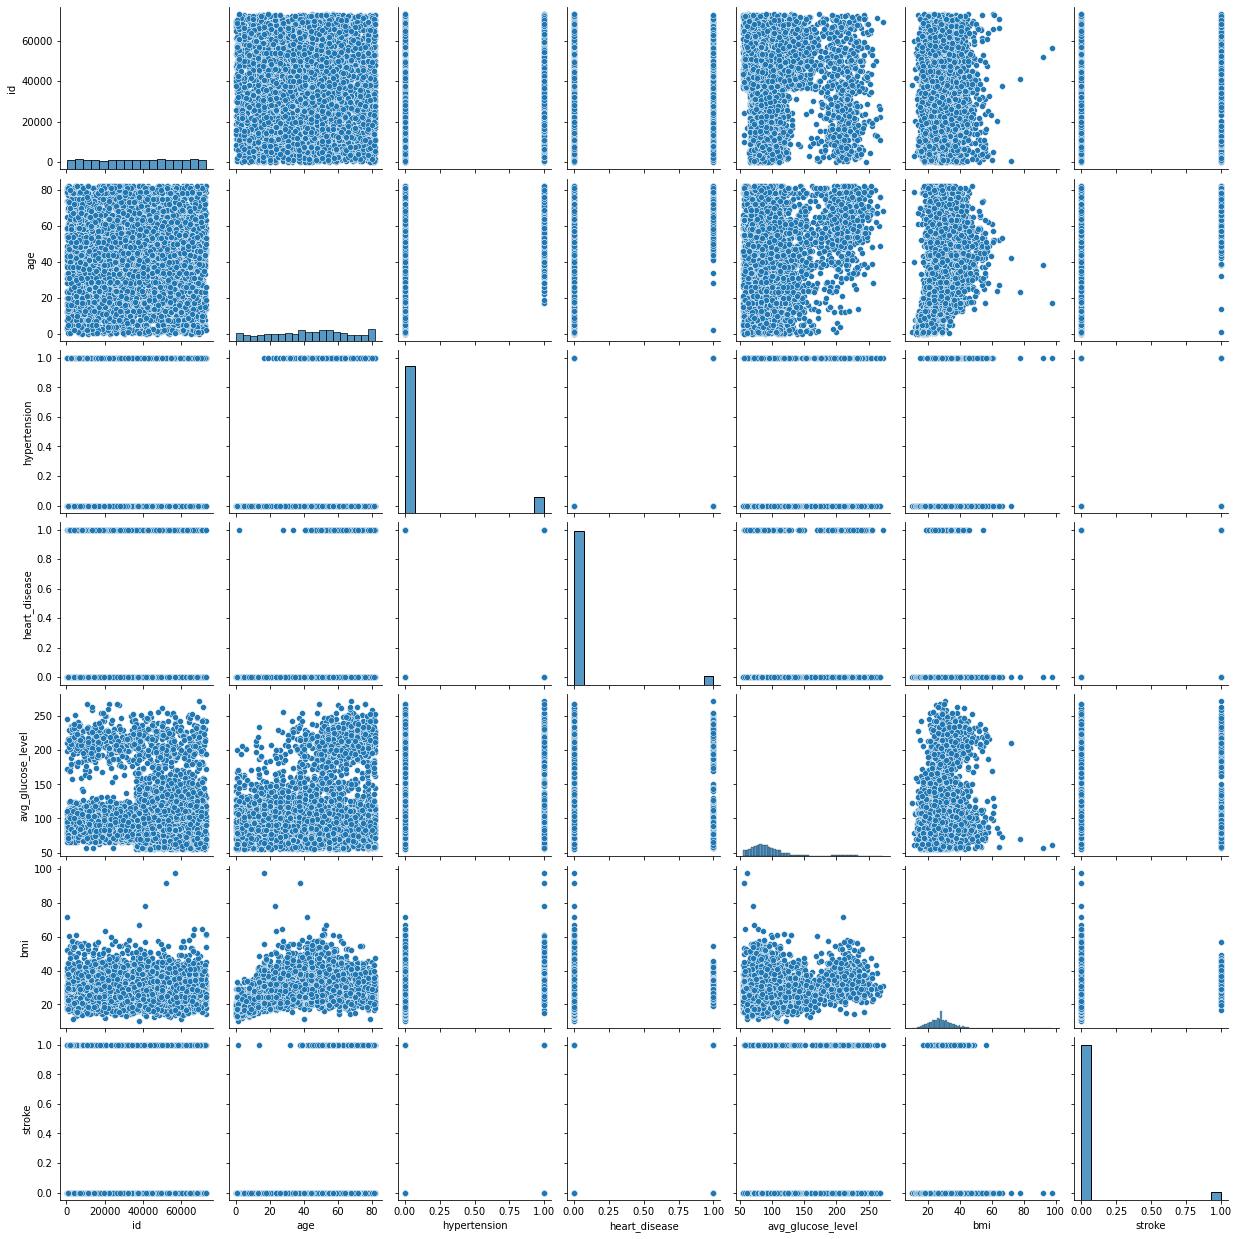

In [ ]:
sns.pairplot(stroke_data)

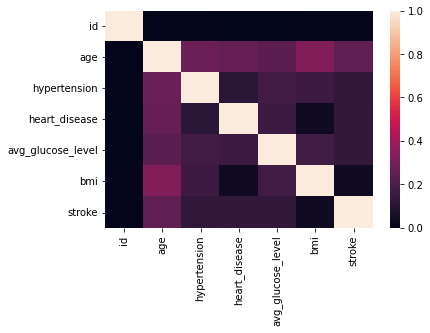

In [ ]:
sns.heatmap(stroke_data.corr())

# MODELLING

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Time to create some dummy variables
data = pd.get_dummies(stroke_data['gender'], drop_first=True)
stroke_data = pd.concat([stroke_data, data], axis=1)

data = pd.get_dummies(stroke_data['ever_married'], drop_first=True)
stroke_data = pd.concat([stroke_data, data], axis=1)

data = pd.get_dummies(stroke_data['work_type'], drop_first=True)
stroke_data = pd.concat([stroke_data, data], axis=1)

data = pd.get_dummies(stroke_data['Residence_type'], drop_first=True)
stroke_data = pd.concat([stroke_data, data], axis=1)

data = pd.get_dummies(stroke_data['smoking_status'], drop_first=True)
stroke_data = pd.concat([stroke_data, data], axis=1)

stroke_data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)

In [ ]:
# Time to do some feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

norm = MinMaxScaler()
norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)

In [ ]:
X_train

array([[0.8510904 , 0.62121212, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.21371615, 0.65786901, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.37838135, 0.97556207, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43100065, 0.01221896, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84748089, 0.97556207, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39603091, 0.5601173 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
predictions
np.unique(predictions)

array([0])

In [ ]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print()
print('F1 score: ', f1_score(y_test, predictions))

[[1591    0]
 [  96    0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687


F1 score:  0.0


## DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(predictions)

array([0, 1])

In [ ]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print()
print('F1 score: ', f1_score(y_test, predictions))

[[1518   73]
 [  78   18]]

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1591
           1       0.20      0.19      0.19        96

    accuracy                           0.91      1687
   macro avg       0.57      0.57      0.57      1687
weighted avg       0.91      0.91      0.91      1687


F1 score:  0.19251336898395724


### TRAINING

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', splitter='random',  max_depth=22, min_samples_split=2,
                                min_samples_leaf=1, random_state=101)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print('F1 Score: ', f1_score(y_test, predictions))

[[1513   78]
 [  85   11]]

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1591
           1       0.12      0.11      0.12        96

    accuracy                           0.90      1687
   macro avg       0.54      0.53      0.53      1687
weighted avg       0.90      0.90      0.90      1687

F1 Score:  0.11891891891891891
